In [ ]:
#pip install tensorflow --upgrade


In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
df = pd.read_csv('Churn_Modelling.csv')

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop("Surname",axis=1,inplace=True)

In [ ]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   RowNumber          10000 non-null  int64  
 1   CustomerId         10000 non-null  int64  
 2   Surname            10000 non-null  object 
 3   CreditScore        10000 non-null  int64  
 4   Gender             10000 non-null  int64  
 5   Age                10000 non-null  int64  
 6   Tenure             10000 non-null  int64  
 7   Balance            10000 non-null  float64
 8   NumOfProducts      10000 non-null  int64  
 9   HasCrCard          10000 non-null  int64  
 10  IsActiveMember     10000 non-null  int64  
 11  EstimatedSalary    10000 non-null  float64
 12  Exited             10000 non-null  int64  
 13  Geography_France   10000 non-null  bool   
 14  Geography_Germany  10000 non-null  bool   
 15  Geography_Spain    10000 non-null  bool   
dtypes: bool(3), float64(2),

In [ ]:
df= pd.get_dummies(df, columns=['Geography'], prefix='Geography')
label_encoder = preprocessing.LabelEncoder()
df['Gender']= label_encoder.fit_transform(df['Gender'])

In [ ]:
from sklearn.preprocessing import StandardScaler
object = StandardScaler()

object.fit_transform(df)

array([[-1.73187761, -0.78321342, -0.32622142, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [-1.7315312 , -0.60653412, -0.44003595, ..., -1.00280393,
        -0.57873591,  1.74273971],
       [-1.73118479, -0.99588476, -1.53679418, ...,  0.99720391,
        -0.57873591, -0.57380915],
       ...,
       [ 1.73118479, -1.47928179,  0.60498839, ...,  0.99720391,
        -0.57873591, -0.57380915],
       [ 1.7315312 , -0.11935577,  1.25683526, ..., -1.00280393,
         1.72790383, -0.57380915],
       [ 1.73187761, -0.87055909,  1.46377078, ...,  0.99720391,
        -0.57873591, -0.57380915]])

In [ ]:
df.info()

In [ ]:
x=df.drop(['Exited','RowNumber','CustomerId'],axis=1)
y=df['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(7, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.1)


Epoch 1/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6290 - loss: 1283.6846 - val_accuracy: 0.7057 - val_loss: 26.4180
Epoch 2/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6688 - loss: 20.6240 - val_accuracy: 0.3671 - val_loss: 17.7895
Epoch 3/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6679 - loss: 8.1857 - val_accuracy: 0.8014 - val_loss: 5.7468
Epoch 4/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6852 - loss: 7.6411 - val_accuracy: 0.2314 - val_loss: 9.4302
Epoch 5/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6687 - loss: 5.7148 - val_accuracy: 0.5271 - val_loss: 2.8046
Epoch 6/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6834 - loss: 5.7812 - val_accuracy: 0.8014 - val_loss: 4.8540
Epoch 7/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6710 - loss: 5.0026 - val_accuracy: 0.7129 - val_loss: 3.0072
Epoch 8/20
197/197 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6782 - loss: 4.6800 - val_accura

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7445 - loss: 0.7753
Test Accuracy: 0.74


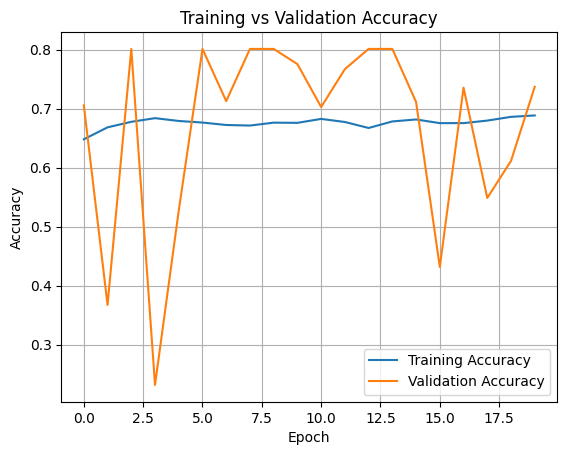

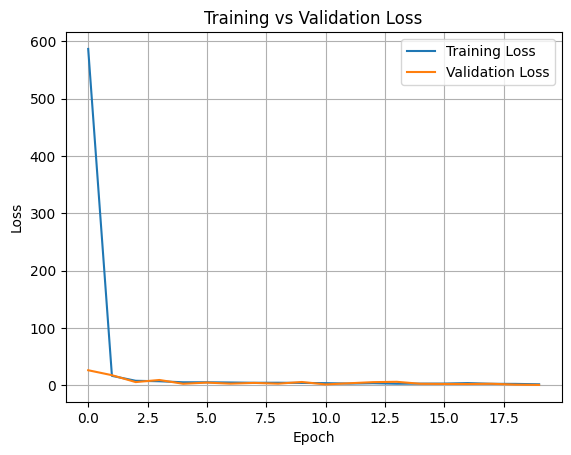

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()
plt.grid(True)
plt.show()
